In [1]:
!pip install tensorflow==2.4.1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=76bfd7450ae717397abbb68f676f24a3b7eae4af7e0584d3baa50724038e3eed
  Stored in directory: c:\users\kaitl\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-win_amd64.whl size=38400 sha256=7a4d2f466195a01978440939e2de974b4cc5c3757f9d969b5687eee1496fe243
  Stored in directory: c:\users\kaitl\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built termcolor wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extens

You should consider upgrading via the 'c:\users\kaitl\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('firstSmile1030') 

# Actions that we try to detect
actions = np.array(['yes', 'no' ])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 30


In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
label_map = {label:num for num, label in enumerate(actions)}


In [19]:
label_map

{'yes': 0, 'no': 1}

In [20]:
sequences, labels = [], []
for action in actions:
    for sequence in range(2,no_sequences):
        window = []
        for frame_num in range(sequence_length -2) :
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num + 2)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
np.array(sequences).shape


(16, 28, 1404)

In [22]:
np.array(labels).shape


(16,)

In [26]:
X = np.array(sequences)
X.shape


(16, 28, 1404)

In [27]:
y = to_categorical(labels).astype(int)


In [28]:
y


array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [30]:
y_test.shape

(1, 2)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(28, 1404)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
res = [.7, 0.2, 0.1]


In [40]:
actions[np.argmax(res)]


'yes'

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [42]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 0.6921 - categorical_accuracy: 0.5333
Epoch 2/2000
1/1 [==============================] - 0s 266ms/step - loss: 0.8032 - categorical_accuracy: 0.5333
Epoch 3/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.6924 - categorical_accuracy: 0.5333
Epoch 4/2000
1/1 [==============================] - 0s 47ms/step - loss: 5.6075 - categorical_accuracy: 0.5333
Epoch 5/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.7799 - categorical_accuracy: 0.5333
Epoch 6/2000
1/1 [==============================] - 0s 45ms/step - loss: 2.9427 - categorical_accuracy: 0.5333
Epoch 7/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.7112 - categorical_accuracy: 0.5333
Epoch 8/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.8296 - categorical_accuracy: 0.4667
Epoch 9/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6914 - categorical_accuracy: 0.5333
Ep

1/1 [==============================] - 0s 44ms/step - loss: 0.6971 - categorical_accuracy: 0.5333
Epoch 75/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6975 - categorical_accuracy: 0.2000
Epoch 76/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6963 - categorical_accuracy: 0.4667
Epoch 77/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6921 - categorical_accuracy: 0.5333
Epoch 78/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6895 - categorical_accuracy: 0.5333
Epoch 79/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.6874 - categorical_accuracy: 0.5333
Epoch 80/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6843 - categorical_accuracy: 0.5333
Epoch 81/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6863 - categorical_accuracy: 0.5333
Epoch 82/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6842 - categorical_accuracy: 0.9333
Epoch 

1/1 [==============================] - 0s 43ms/step - loss: 0.5169 - categorical_accuracy: 1.0000
Epoch 147/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.5759 - categorical_accuracy: 0.5333
Epoch 148/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.4500 - categorical_accuracy: 0.9333
Epoch 149/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.4504 - categorical_accuracy: 1.0000
Epoch 150/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.3824 - categorical_accuracy: 0.7333
Epoch 151/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.6599 - categorical_accuracy: 0.4667
Epoch 152/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.3842 - categorical_accuracy: 0.9333
Epoch 153/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.3035 - categorical_accuracy: 0.5333
Epoch 154/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.8232 - categorical_accuracy: 0.466

1/1 [==============================] - 0s 45ms/step - loss: 0.6571 - categorical_accuracy: 0.9333
Epoch 219/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.6338 - categorical_accuracy: 0.5333
Epoch 220/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.5889 - categorical_accuracy: 0.9333
Epoch 221/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.9166 - categorical_accuracy: 0.4667
Epoch 222/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.8134 - categorical_accuracy: 0.5333
Epoch 223/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.7448 - categorical_accuracy: 0.5333
Epoch 224/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.7109 - categorical_accuracy: 0.5333
Epoch 225/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.7048 - categorical_accuracy: 0.5333
Epoch 226/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6970 - categorical_accuracy: 0.533

1/1 [==============================] - 0s 63ms/step - loss: 0.6655 - categorical_accuracy: 0.5333
Epoch 291/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.6602 - categorical_accuracy: 0.8667
Epoch 292/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.6566 - categorical_accuracy: 0.5333
Epoch 293/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.6558 - categorical_accuracy: 0.5333
Epoch 294/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.6511 - categorical_accuracy: 0.5333
Epoch 295/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.6435 - categorical_accuracy: 1.0000
Epoch 296/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6422 - categorical_accuracy: 0.8000
Epoch 297/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6308 - categorical_accuracy: 0.9333
Epoch 298/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6272 - categorical_accuracy: 0.666

1/1 [==============================] - 0s 41ms/step - loss: 0.6964 - categorical_accuracy: 0.5333
Epoch 363/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6947 - categorical_accuracy: 0.5333
Epoch 364/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6936 - categorical_accuracy: 0.5333
Epoch 365/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6928 - categorical_accuracy: 0.5333
Epoch 366/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6921 - categorical_accuracy: 0.5333
Epoch 367/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6915 - categorical_accuracy: 0.5333
Epoch 368/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6911 - categorical_accuracy: 0.5333
Epoch 369/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6907 - categorical_accuracy: 0.5333
Epoch 370/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6901 - categorical_accuracy: 0.533

1/1 [==============================] - 0s 44ms/step - loss: 0.6910 - categorical_accuracy: 0.5333
Epoch 435/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6909 - categorical_accuracy: 0.5333
Epoch 436/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6909 - categorical_accuracy: 0.5333
Epoch 437/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6909 - categorical_accuracy: 0.5333
Epoch 438/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6910 - categorical_accuracy: 0.5333
Epoch 439/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6910 - categorical_accuracy: 0.5333
Epoch 440/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6910 - categorical_accuracy: 0.5333
Epoch 441/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6909 - categorical_accuracy: 0.5333
Epoch 442/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6909 - categorical_accuracy: 0.533

1/1 [==============================] - 0s 47ms/step - loss: 0.6876 - categorical_accuracy: 0.5333
Epoch 507/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6875 - categorical_accuracy: 0.5333
Epoch 508/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6874 - categorical_accuracy: 0.5333
Epoch 509/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6874 - categorical_accuracy: 0.5333
Epoch 510/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6873 - categorical_accuracy: 0.5333
Epoch 511/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6872 - categorical_accuracy: 0.5333
Epoch 512/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6872 - categorical_accuracy: 0.5333
Epoch 513/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6871 - categorical_accuracy: 0.5333
Epoch 514/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6870 - categorical_accuracy: 0.533

1/1 [==============================] - 0s 43ms/step - loss: 0.6695 - categorical_accuracy: 0.8667
Epoch 579/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6674 - categorical_accuracy: 0.8667
Epoch 580/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6644 - categorical_accuracy: 0.5333
Epoch 581/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6619 - categorical_accuracy: 0.5333
Epoch 582/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6585 - categorical_accuracy: 0.5333
Epoch 583/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.6482 - categorical_accuracy: 0.8000
Epoch 584/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.7182 - categorical_accuracy: 0.4667
Epoch 585/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6430 - categorical_accuracy: 0.8667
Epoch 586/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.8169 - categorical_accuracy: 0.533

1/1 [==============================] - 0s 43ms/step - loss: 0.0223 - categorical_accuracy: 1.0000
Epoch 651/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0166 - categorical_accuracy: 1.0000
Epoch 652/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0182 - categorical_accuracy: 1.0000
Epoch 653/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0107 - categorical_accuracy: 1.0000
Epoch 654/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 655/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 656/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 657/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.0042 - categorical_accuracy: 1.0000
Epoch 658/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0032 - categorical_accuracy: 1.000

1/1 [==============================] - 0s 45ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 721/2000
1/1 [==============================] - 0s 45ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 722/2000
1/1 [==============================] - 0s 43ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 723/2000
1/1 [==============================] - 0s 42ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 724/2000
1/1 [==============================] - 0s 44ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 725/2000
1/1 [==============================] - 0s 42ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 726/2000
1/1 [==============================] - 0s 43ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 727/2000
1/1 [==============================] - 0s 44ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 728/2000
1/1 [==============================] - 0s 42ms/step - loss: 7.94

1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 791/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 792/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 793/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 794/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 795/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 796/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 797/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 798/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.94

1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 861/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 862/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 863/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 864/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 865/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 866/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 867/2000
1/1 [==============================] - 0s 42ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 868/2000
1/1 [==============================] - 0s 42ms/step - loss: 7.94

1/1 [==============================] - 0s 43ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 931/2000
1/1 [==============================] - 0s 42ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 932/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 933/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 934/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 935/2000
1/1 [==============================] - 0s 43ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 936/2000
1/1 [==============================] - 0s 42ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 937/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 938/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.94

1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1001/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1002/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1003/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1004/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1005/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1006/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1007/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1008/2000
1/1 [==============================] - 0s 38ms/step - lo

1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1070/2000
1/1 [==============================] - 0s 47ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1071/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1072/2000
1/1 [==============================] - 0s 36ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1073/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1074/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1075/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1076/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1077/2000
1/1 [==============================] - 0s 39ms/step - lo

1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1139/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1140/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1141/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1142/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1143/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1144/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1145/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1146/2000
1/1 [==============================] - 0s 40ms/step - lo

1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1208/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1209/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1210/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1211/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1212/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1213/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1214/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1215/2000
1/1 [==============================] - 0s 38ms/step - lo

1/1 [==============================] - 0s 44ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1277/2000
1/1 [==============================] - 0s 46ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1278/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1279/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1280/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1281/2000
1/1 [==============================] - 0s 36ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1282/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1283/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1284/2000
1/1 [==============================] - 0s 36ms/step - lo

1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1346/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1347/2000
1/1 [==============================] - 0s 36ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1348/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1349/2000
1/1 [==============================] - 0s 36ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1350/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1351/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1352/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1353/2000
1/1 [==============================] - 0s 38ms/step - lo

1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1415/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1416/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1417/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1418/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1419/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1420/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1421/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1422/2000
1/1 [==============================] - 0s 36ms/step - lo

1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1484/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1485/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1486/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1487/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1488/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1489/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1490/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1491/2000
1/1 [==============================] - 0s 37ms/step - lo

1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1553/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1554/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1555/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1556/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1557/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1558/2000
1/1 [==============================] - 0s 36ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1559/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1560/2000
1/1 [==============================] - 0s 37ms/step - lo

1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1622/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1623/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1624/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1625/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1626/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1627/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1628/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1629/2000
1/1 [==============================] - 0s 38ms/step - lo

1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1691/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1692/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1693/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1694/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1695/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1696/2000
1/1 [==============================] - 0s 36ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1697/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1698/2000
1/1 [==============================] - 0s 40ms/step - lo

1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1760/2000
1/1 [==============================] - 0s 43ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1761/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1762/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1763/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1764/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1765/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1766/2000
1/1 [==============================] - 0s 42ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1767/2000
1/1 [==============================] - 0s 41ms/step - lo

1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1829/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1830/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1831/2000
1/1 [==============================] - 0s 36ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1832/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1833/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1834/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1835/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1836/2000
1/1 [==============================] - 0s 40ms/step - lo

1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1898/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1899/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1900/2000
1/1 [==============================] - 0s 35ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1901/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1902/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1903/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1904/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1905/2000
1/1 [==============================] - 0s 39ms/step - lo

1/1 [==============================] - 0s 36ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1967/2000
1/1 [==============================] - 0s 42ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1968/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1969/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1970/2000
1/1 [==============================] - 0s 37ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1971/2000
1/1 [==============================] - 0s 36ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1972/2000
1/1 [==============================] - 0s 40ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1973/2000
1/1 [==============================] - 0s 41ms/step - loss: 7.9473e-09 - categorical_accuracy: 1.0000
Epoch 1974/2000
1/1 [==============================] - 0s 41ms/step - lo

In [43]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 28, 64)            376064    
_________________________________________________________________
lstm_4 (LSTM)                (None, 28, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 530,594
Trainable params: 530,594
Non-trainable params: 0
________________________________________________

In [44]:
res = model.predict(X_test)

In [45]:
actions[np.argmax(res[0])]


'yes'

In [46]:
actions[np.argmax(y_test[0])]


'yes'

In [47]:
model.save('action_face.h5')


In [48]:
del model


In [49]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(28, 1404)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


model.load_weights('action_face.h5')

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools


In [51]:
yhat = model.predict(X_test)
yhat

array([[1.000000e+00, 4.684263e-15]], dtype=float32)

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0]
 [0 1]]


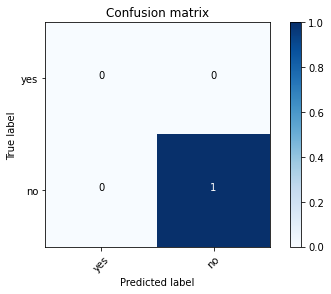

In [53]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

cnf_matrix = confusion_matrix(ytrue, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['yes','no'],normalize= False,  title='Confusion matrix')

In [54]:
accuracy_score(ytrue, yhat)


1.0

In [55]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [59]:
import cv2
import mediapipe
import numpy as np
import csv
cap = cv2.VideoCapture(0)
sequence = []
sentence = []
threshold = 0.9
print(type(sequence))


# facemesh

faceModule = mediapipe.solutions.face_mesh
mp_drawing = mediapipe.solutions.drawing_utils # Drawing helpers

circleDrawingSpec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mp_drawing.DrawingSpec(thickness=1, color=(0,255,0))
 
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = face.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                point_values = []

                for i in range(0, 468):
                    pt1 = faceLandmarks.landmark[i]

                    point_values.append(pt1.x)
                    point_values.append(pt1.y)
                    point_values.append(pt1.z)
                
                
                keypoints = np.array(point_values)
                sequence.append(keypoints)
                sequence = sequence[-28:]
                if len(sequence) == 28:
                    res = model.predict(np.expand_dims(sequence, axis=0))[0]
                    print(actions[np.argmax(res)])

                    #3. Viz logic
                    if res[np.argmax(res)] > threshold: 
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                    if len(sentence) > 5: 
                        sentence = sentence[-5:]

                    # Viz probabilities
                    image = prob_viz(res, actions, image, colors)
                    cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'list'>
no
no
yes
yes
no
yes
no
yes
yes
yes
yes
no
yes
no
yes
yes
no
yes
yes
no
yes
yes
yes
yes
no
yes
no
no
no
no
yes
no
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
no
no
no
no
no
yes
yes
yes
no
yes
yes
no
yes
yes
yes
no
yes
no
yes
yes
no
yes
no
yes
yes
yes
yes
no
yes
yes
yes
no
yes
no
yes
yes
no
yes
no
no
yes
no
yes
no
yes
no
yes
no
no
no
yes
no
no
no
no
yes
yes
no
no
no
no
yes
no
no
no
yes
yes
no
yes
no
yes
no
no
no
yes
no
yes
yes
yes
yes
no
no
no
yes
yes
yes
no
no
yes
yes
no
yes
yes
no
yes
yes
no
no
no
yes
yes
no
yes
no
yes
yes
yes
no
no
no
yes
yes
yes
no
yes
yes
yes
no
no
no
yes
no
no
yes
yes
no
no
yes
no
no
yes
no
yes
yes
yes
yes
yes
yes
no
no
yes
yes
yes
no
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
no
yes
yes
yes
yes
no
no
yes
yes
no
no
no
yes
no
yes
yes
no
yes
yes
yes
no
no
yes
yes
yes
yes
no
no
yes
no
no
no
no
no
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
no
yes
no
no
yes
yes
no
yes
no
yes
yes
yes
no
no
no
yes
no
no
n